<a href="https://colab.research.google.com/github/PrecyMaeMwanyungu/Fabulous-tokenizers_disaster_tweets_repository/blob/master/Fabulous_Tokenizers__Project_Week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining our question

> Many institutions such as disaster relief organizations and news agencies have been interested in using twitter to get information on emergencies. However, some of the tweets on twitter are real disaster tweets while some are not. Due to the increased use of twitter as a platform for announcing disasters, have been tasked to build a machine learning model that determines whether or not a tweet is a real disaster tweet or not.


### a) Specifying the Question

> Predict which tweets are about real disasters and which ones are not.


### b) Defining the Metric for Success
Our study will be successful if we are able to:

* Build models that classify tweets that are disasters and those that are not. 
* Build models with an accuracy of 80%


### c) Understanding the context

> Twitter has become an important communication channel in times of emergency.The use of smart phones enables people to announce an emergency they’re observing in real-time and as a result, more agencies are interested in programmatically monitoring Twitter (i.e. disaster relief organizations and news agencies.)

### d) Recording the Experimental Design

**1) Business Understanding:** Understanding the business problem.

**2) Reading the data:** Getting access to our train, test and sample submission data and reading it on  python pandas.

**3) Checking our data:** Understanding our variables, the number of rows and columns per dataset as well as unique values in the data.

**4) Data cleaning:** Checking for any missing values, duplicates and solving them.

**5) Text Preprocessing:**  removing noise from our text data,converting all our data to lowercase, removing stop-words and word tokenization . 

**6)EDA:** visualizing our data using univariate, bivariate and multivariate analysis.

**7) Feature engineering:** In this stage we convert the preprocessed data into features for machine learning models to work on.

**6) Implementing the solution (Modelling):** using classification algorithms like SVM, Naive Bayes and Bert Tokenizer to make predictions.

**7) Conclusion:** concluding on the best model for our predictions.

# Understanding our data.

## Reading our data

In [ ]:
# Loading libraries
import numpy as np
import pandas as pd

In [ ]:
# Reading the data
train= pd.read_csv("/content/train (7).csv")
test= pd.read_csv("/content/test (5).csv")
submit= pd.read_csv("/content/sample_submission.csv")

In [ ]:
# Loading the head
print("Train")
print(train.head())
print("")
print("Test")
print(test.head())
print("")
print("Sample Submission")
print (submit.head())

Train
   id keyword  ...                                               text target
0   1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1   4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2   5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3   6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4   7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1

[5 rows x 5 columns]

Test
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

Sample Submission
   id  target
0   0       0
1   2       0

In [ ]:
# dtypes
print(train.dtypes)
print("")
print(test.dtypes)

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

id           int64
keyword     object
location    object
text        object
dtype: object


In [ ]:
# Shape
print("Train number of rows and columns are : ", train.shape)
print("Test number of rows and columns are : ", test.shape)
print("Sample submission number of rows and columns are : ", submit.shape)

Train number of rows and columns are :  (7613, 5)
Test number of rows and columns are :  (3263, 4)
Sample submission number of rows and columns are :  (3263, 2)


In [ ]:
# Lets see what non diasaster tweet looks like
non_disaster = train[train['target']==0]['text']
non_disaster.values[10]

'no wayi cant eat that shit'

In [ ]:
# Lets see what diasaster tweet looks like
disaster_t = train[train['target']==1]['text']
disaster_t.values

array(['our deeds are the reason of this earthquake may allah forgive us all',
       'forest fire near la ronge sask canada',
       'all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected',
       ..., '   s of volcano hawaii ',
       'police investigating after an ebike collided with a car in little portugal ebike rider suffered serious nonlife threatening injuries',
       'the latest more homes razed by northern california wildfire  abc news '],
      dtype=object)

## Data Cleaning

### Missing values

In [ ]:
# Null values
print("")
print("Train missing per column")
print(train.isnull().sum())
print("")
print("Test missing per column")
print(test.isnull().sum())
print("")
print("Sample submission missing per column")
print(submit.isnull().sum())


Train missing per column
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Test missing per column
id             0
keyword       26
location    1105
text           0
dtype: int64

Sample submission missing per column
id        0
target    0
dtype: int64


> Missing variables per column train, test and submit

In [ ]:
# Dropping null values
train.dropna(inplace=True)
test.dropna(inplace=True)

In [ ]:
# Confirming the number of missing values for both train and test
print("Number of missing values in train",train.isnull().sum().sum())
print("Number of missing values in test",test.isnull().sum().sum())

Number of missing values in train 0
Number of missing values in test 0


### Duplicates

In [ ]:
# Duplicates
print("Train duplicated? ", train.duplicated().any())

print("")
print("Test duplicated? ", test.duplicated().any())

print("")
print("Sample submission duplicated? ",submit.duplicated().any())


Train duplicated?  False

Test duplicated?  False

Sample submission duplicated?  False


> No duplicates. 

### Text pre-processing

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer # For tokenization
from nltk.stem import WordNetLemmatizer,PorterStemmer # For lemmatization
from nltk.corpus import stopwords# To remove stop words
nltk.download('stopwords')
nltk.download('wordnet')
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") # removing html files
    cleanr = re.compile('<.*?>') # Removing puncruation
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext) # Removing links
    rem_num = re.sub('[0-9]+', '', rem_url)  # Removing numbers
    tokenizer = RegexpTokenizer(r'\w+') # Tokenization
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

# Mapping our loop to our datasets
test['cleanText']=test['text'].map(lambda s:preprocess(s))
train['cleanText']=train['text'].map(lambda s:preprocess(s))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# EDA

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


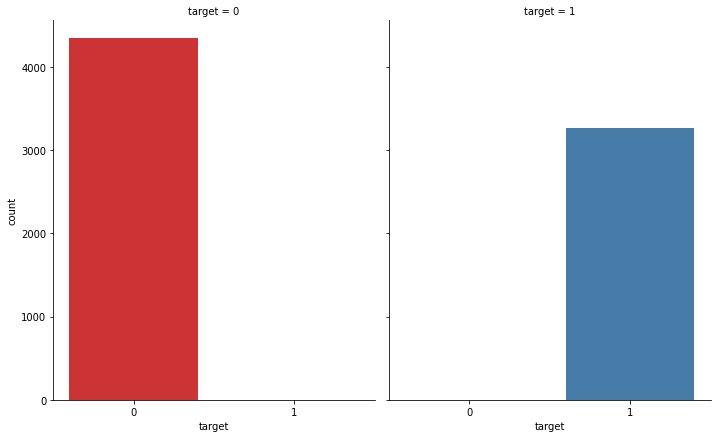

In [ ]:
# Bar charts for real or not real
#
sns.catplot("target", col="target", col_wrap=4, data=train, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

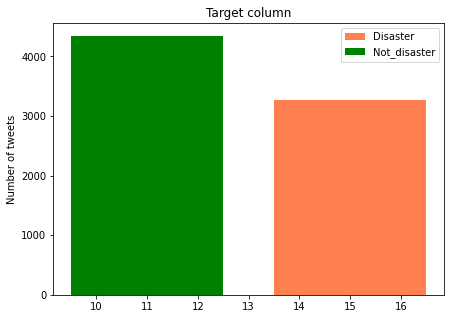

In [ ]:
#bar plot of the 3 classes
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(15,Disaster,3, label="Disaster", color='coral')
plt.bar(11,Not_disaster,3, label="Not_disaster", color='green')
plt.ylabel('Number of tweets')
plt.title('Target column')
plt.legend()
plt.show()

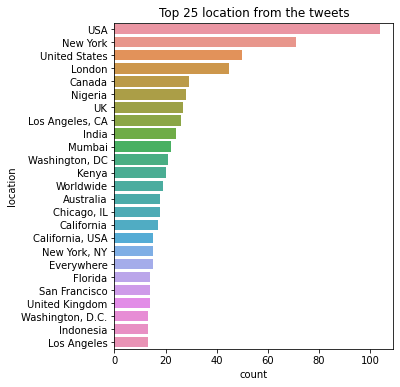

In [ ]:
# Check the most frequent location
plt.figure(figsize=(5,6))
sns.countplot(y=train.location, order = train.location.value_counts().iloc[:25].index)
plt.title('Top 25 location from the tweets')
plt.show()

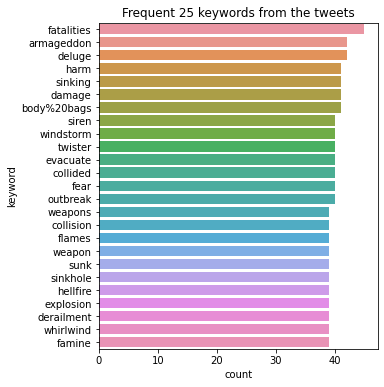

In [ ]:
# Check the most frequent keywords
plt.figure(figsize=(5,6))
sns.countplot(y=train.keyword, order = train.keyword.value_counts().iloc[:25].index)
plt.title('Frequent 25 keywords from the tweets')
plt.show()

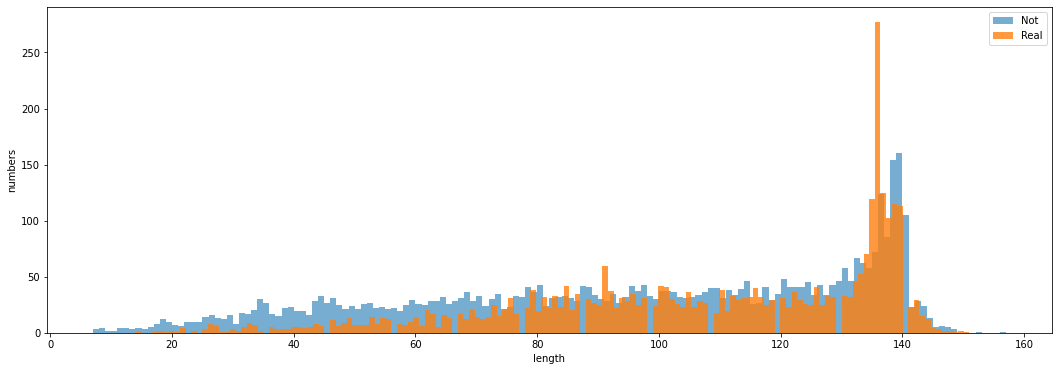

In [ ]:
# Distribution of real or not real
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(train[train['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Not')
plt.hist(train[train['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
#plt.xlim(0,150)

plt.show()

### Pandas Profiling

In [ ]:
!pip install pandas_profiling

In [ ]:
 !pip3 install pandas_profiling --upgrade

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train,html={'style':{'full_width':True}})

In [ ]:
profile 

count    5080.000000
mean        8.867717
std         3.405377
min         1.000000
25%         6.000000
50%         9.000000
75%        11.000000
max        21.000000
Name: cleanText, dtype: float64


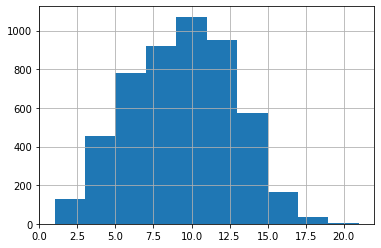

In [ ]:
# Getting the statistical distribution of our text data
lens = train_df.cleanText.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

Our texts has an average of 9 words per tweet.

In [ ]:
# Term frequencies
# In this step, I find the most frequent words in the data, extracting information about its content and topics.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stops =  set(stopwords.words('english')+['com'])
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(train_df.cleanText)
w=pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(20)
w.head()

,0
like,236
amp,216
new,178
fire,175
via,159


> The most used words are like, amp, new and fire. 

In [ ]:
# check for frequent bi-gram words
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)
counts = co.fit_transform(train_df.cleanText)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(20)

,0
burning buildings,44
suicide bomber,29
looks like,28
youtube video,27
oil spill,26
liked youtube,26
full read,26
prebreak best,25
cross body,24
mass murder,24


> Some of the most used bi-gram words are burning buildings	(44), suicide bomber (29), looks like	(28) and youtube video (27).

In [ ]:
# To show distribution of stop words in our original data
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))
#
corpus=[]
new= train['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<BarContainer object of 10 artists>

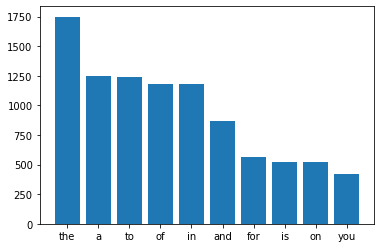

In [ ]:
# Stop words
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

# Feature engineering

In [ ]:
# Getting the word count, character count and word density for our data
from plotly.offline import init_notebook_mode, iplot

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
from textblob import TextBlob 

!pip install plotly --upgrade
from plotly import tools
import seaborn as sns
import pandas as pd
import string, os, random

init_notebook_mode(connected=True)
punc = string.punctuation
#
train_df['word_count'] = train_df['cleanText'].apply(lambda x : len(x.split()))
train_df['char_count'] = train_df['cleanText'].apply(lambda x : len(x.replace(" ","")))
train_df['word_density'] = train_df['word_count'] / (train_df['char_count'] + 1)
train_df['punc_count'] = train_df['cleanText'].apply(lambda x : len([a for a in x if a in punc]))

train_df[['word_count', 'char_count', 'word_density', 'punc_count']].head(10)

     |████████████████████████████████| 13.1MB 322kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,word_count,char_count,word_density,punc_count
31,4,28,0.137931,0
32,5,24,0.200000,0
33,8,46,0.170213,0
34,3,15,0.187500,0
35,7,30,0.225806,0
36,13,71,0.180556,0
37,5,23,0.208333,0
39,2,10,0.181818,0
40,2,9,0.200000,0
42,14,71,0.194444,0


> The word count, word density and punctuation count for our text.

In [ ]:
# function to obtain the sentiment of the tweets using textblob package
def get_polarity(text):
    try:
        pol = TextBlob(text).sentiment.polarity
    except:
        pol = 0.0
    return pol

# 
train_df['polarity'] = train_df['cleanText'].apply(get_polarity)
    
train_df[['polarity']].tail(10)

,polarity
7570,0.000000
7571,0.200000
7572,0.000000
7573,0.500000
7574,0.000000
7575,0.700000
7577,0.800000
7579,0.216667
7580,0.000000
7581,0.400000


(array([  29.,   66.,  156.,  374.,  424., 3179.,  450.,  264.,   54.,
          84.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

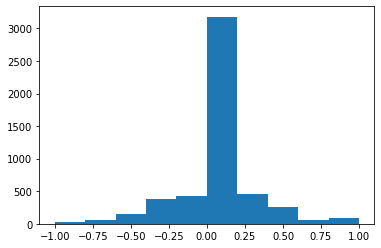

In [ ]:
# A histogram of the polarity
plt.hist(train_df['polarity'], bins=10)

In [ ]:
# Top Positive tweets
sorteddf = train_df.sort_values(by='polarity')
posdf = sorteddf.tail(5000) # For the most positive tweets
negdf = sorteddf.head(5000) # For the most negative tweets

posdf[['cleanText']].tail(10)

,cleanText
7178,honey angel like scream words weapon well ahea...
5757,retweeted sarah silverman sarahksilverman soun...
5377,panic disco best song gospel acoustic
5298,senatemajldr let try best prevent another outb...
4972,read awesome book yet two trillion dollar melt...
4697,crowtherjohn effiedeans keep head sand john be...
4711,perfect night soak lava come
4819,owenrbroadhurst juanmthompson hour yrs ago one...
6232,reason knocking someone door snowstorm wearing...
2035,therealrittz fettilootch slanglucci oppression...


In [ ]:
# Top Negative tweets
negdf[['cleanText']].head(10)

,cleanText
143,horrible accident man died wings airplane
162,omg horrible accident man died wings airplane
5856,ruin something awful minions
6079,sewer look like sinking happens pre sinkhole g...
5857,really awful cant even work make artist ruin t...
501,envw nickcocofree juliedicaro jdabe worst pers...
4134,grow calgary avoids worst city wicked weather
3976,myanmar msf assisting thousands worst flooding...
1797,destinythegame bungie playstation getting kick...
154,horrible accident man died wings airplane


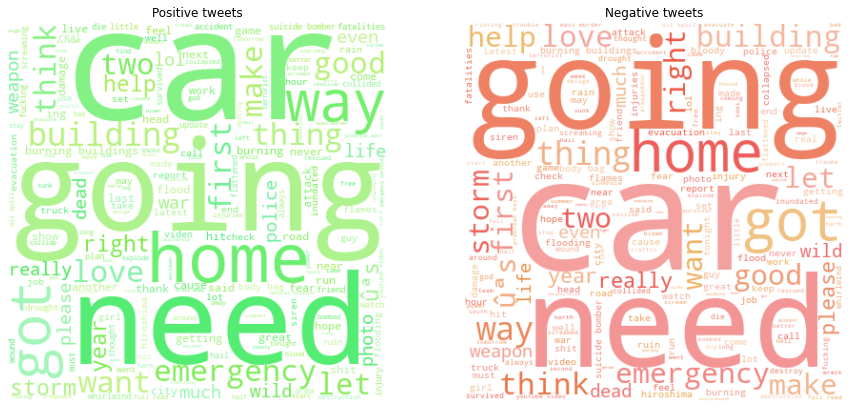

In [ ]:
pos_text_cln = " ".join(posdf.cleanText)
neg_text_cln = " ".join(negdf.cleanText)

# replacing some most common words present in these texts
noise_words = ['like', 'amp', 'new', 'fire','death','people','one','time','day','every','know','via','say','man','world', 'back','see','look','still']
for noise in noise_words:
    pos_text_cln = pos_text_cln.lower().replace(noise," ")
    neg_text_cln = neg_text_cln.lower().replace(noise, " ")

def green_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(85, 140), random.randint(60, 80))

def red_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(0, 35), random.randint(60, 80))
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 8])
wordcloud1 = WordCloud(background_color='white', height=400).generate(pos_text_cln)

ax1.imshow(wordcloud1.recolor(color_func=green_color, random_state=3),interpolation="bilinear")
ax1.axis('off');
ax1.set_title('Positive tweets');

wordcloud2 = WordCloud(background_color='white', height=400).generate(neg_text_cln)
ax2.imshow(wordcloud2.recolor(color_func=red_color, random_state=3),interpolation="bilinear")
ax2.axis('off');
ax2.set_title('Negative tweets');

In [ ]:
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# To show distribution of stop words in our original data
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))
#
corpus=[]
new= train['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<BarContainer object of 10 artists>

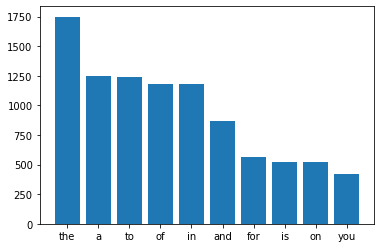

In [ ]:
# Stop words
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

> The most used stop word in our tweets is 'the' followed by 'a'.

> Our records have less disaster tweets than those that are disaster tweets.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/s

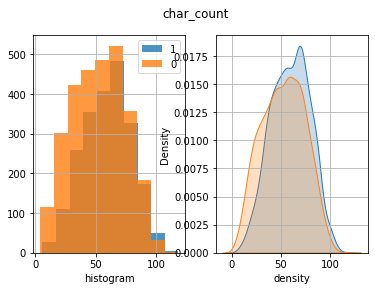

In [ ]:
# Plotting tweet word count per category
x, y = "char_count", "target"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in train_df[y].unique():
    sns.distplot(train_df[train_df[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(train_df[train_df[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(train_df[y].unique())
ax[1].grid(True)
plt.show()

> the non disaster tweets have more character count.

In [ ]:
train_df.head()

,location,keyword,cleanText,target,word_count,char_count,word_density,punc_count,polarity
31,Birmingham,ablaze,bbcmtd wholesale markets ablaze,1,4,28,0.137931,0,0.0
32,Est. September 2012 - Bristol,ablaze,always try bring heavy metal,0,5,24,0.200000,0,-0.2
33,AFRICA,ablaze,africanbaze breaking news nigeria flag set abl...,1,8,46,0.170213,0,0.0
34,"Philadelphia, PA",ablaze,crying set ablaze,0,3,15,0.187500,0,-0.2
35,"London, UK",ablaze,plus side look sky last night ablaze,0,7,30,0.225806,0,0.0


In [ ]:
# Changing the datatypes of our country and keyword
train_df["location"] = train_df["location"].astype('category')
train_df["keyword"] = train_df["keyword"].astype('category')
train_df.dtypes

location        category
keyword         category
cleanText         object
target             int64
word_count         int64
char_count         int64
word_density     float64
punc_count         int64
polarity         float64
dtype: object

In [ ]:
# Label encoding
train_df["location"] = train_df["location"].cat.codes
train_df["keyword"] = train_df["keyword"].cat.codes
train_df.head()

,location,keyword,cleanText,target,word_count,char_count,word_density,punc_count,polarity
31,453,0,bbcmtd wholesale markets ablaze,1,4,28,0.137931,0,0.0
32,922,0,always try bring heavy metal,0,5,24,0.200000,0,-0.2
33,209,0,africanbaze breaking news nigeria flag set abl...,1,8,46,0.170213,0,0.0
34,2054,0,crying set ablaze,0,3,15,0.187500,0,-0.2
35,1516,0,plus side look sky last night ablaze,0,7,30,0.225806,0,0.0


# Modelling

### Naive Bayes ( Multinomial)
*  We will use naive bayes as our base model as it can be able to classify an NLP problem. The model we will use should therefore be more accurate than the Naive Bayes.

* Naive Bayes is relatively robust, easy to implement, fast, and accurate, it is used in many different fields like .

Assumptions:  
>* Features in the dataset are mutually independent. Occurrence of one feature does not affect the probability of occurrence of the other feature.


In [ ]:
# Naive Bayes
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  79.39632545931758


Our Naive Bayes model performed fairly well with an accuracy of 79% which is not so bad for a classification problem.

In [ ]:
#Getting the metrics for assessing our baseline model
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(Test_Y,predictions_NB))
print(classification_report(Test_Y,predictions_NB))

[[773  83]
 [231 437]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       856
           1       0.84      0.65      0.74       668

    accuracy                           0.79      1524
   macro avg       0.81      0.78      0.78      1524
weighted avg       0.80      0.79      0.79      1524



* Naive Bayes made (773+437 ) correct predictions and (231 + 83) false predictions. 

### SVM


In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  80.11811023622047


In [ ]:
print(confusion_matrix(Test_Y,predictions_SVM))
print(classification_report(Test_Y,predictions_SVM))

[[736 120]
 [222 446]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       856
           1       0.79      0.67      0.72       668

    accuracy                           0.78      1524
   macro avg       0.78      0.76      0.77      1524
weighted avg       0.78      0.78      0.77      1524



# BERT (Bidirectional Encoder Representations from Transformers) 


In [ ]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

In [ ]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [ ]:
pip install sentencepiece

     |████████████████████████████████| 1.1MB 8.1MB/s 


In [ ]:
import tokenization

In [ ]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [ ]:
def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(clf_output)
    
    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=2e-6), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
%%time
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)

CPU times: user 22.2 s, sys: 4.55 s, total: 26.8 s
Wall time: 36.4 s


In [ ]:
## Loading a tokenizer from the bert layer
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
##Encoding the text into tokens, masks, and segment flags:
train_input = bert_encode(train.text.values, tokenizer, max_len=160)
test_input = bert_encode(test.text.values, tokenizer, max_len=160)
train_labels = train.target.values

In [ ]:
train_labels

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
test_input[:1]

(array([[  101,  2074,  3047, ...,     0,     0,     0],
        [  101,  2657,  2055, ...,     0,     0,     0],
        [  101,  2045,  2003, ...,     0,     0,     0],
        ...,
        [  101,  2665,  2240, ...,     0,     0,     0],
        [  101, 12669,  3314, ...,     0,     0,     0],
        [  101,  1001,  2103, ...,     0,     0,     0]]),)

In [ ]:
model = build_model(bert_layer, max_len=160)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 160)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 160)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 1024), (None 335141889   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

In [ ]:
train_history = model.fit(
    train_input, train_labels,
    validation_split=0.2,
    epochs=5,
    batch_size=16
)

model.save('model.h5')

Epoch 1/5
381/381 [==============================] - 691s 2s/step - loss: 0.4694 - accuracy: 0.7867 - val_loss: 0.4045 - val_accuracy: 0.8273
Epoch 2/5
381/381 [==============================] - 703s 2s/step - loss: 0.3279 - accuracy: 0.8644 - val_loss: 0.4026 - val_accuracy: 0.8372
Epoch 3/5
381/381 [==============================] - 703s 2s/step - loss: 0.2316 - accuracy: 0.9089 - val_loss: 0.4390 - val_accuracy: 0.8293
Epoch 4/5
381/381 [==============================] - 703s 2s/step - loss: 0.1429 - accuracy: 0.9486 - val_loss: 0.4964 - val_accuracy: 0.8227
Epoch 5/5
381/381 [==============================] - 704s 2s/step - loss: 0.0862 - accuracy: 0.9711 - val_loss: 0.5306 - val_accuracy: 0.8247


In [ ]:
test_pred = model.predict(test_input)

In [ ]:
len(test_pred)

3263

In [ ]:
sub['target'] = test_pred.round().astype(int)
sub.to_csv('submission.csv', index=False)
sub.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


> This model  ranked number 334  out of 1356  .Its a good baseline model and we can  brainstorm on how to improve  its accuracy

# Conclusions and Recommendations


---
* 



# Follow up Questions




---

#### Did we have the correct data? 

>Yes 

